## Figures for the paper

### Figure 1

Historical (1991-2000) April Tmax and Annual PR for (1) WRF, (2) Livneh, (3) LOCA-WRF, and (4) LOCA-Livneh.

In [41]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import netCDF4

In [44]:
# Adding State/Province boundaries with built-in Cartopy features
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greate

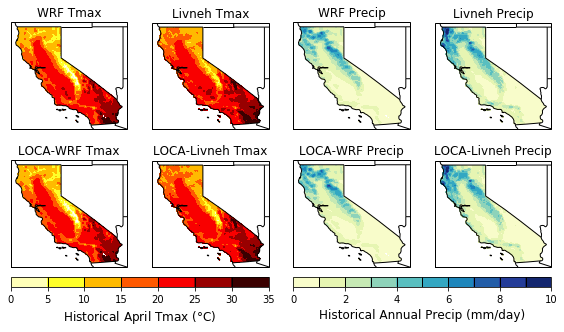

In [124]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

datasets = ['wrf', 'livneh', 'loca_wrf', 'loca_livneh']

# First 2 rows/cols: April Tmax
ticks_tmax = np.linspace(0,35,8)

wrf_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_tmax_april_CA_mask.nc', 'r')
wrf_tmax = wrf_nc.variables['tmax'][:,:]
wrf_lat = wrf_nc.variables['lat'][:]
wrf_lon = wrf_nc.variables['lon'][:]
wrf_nc.close()

livneh_nc = netCDF4.Dataset(data_dir+'livneh_hist_1991-2000_tmax_april_CA_mask.nc', 'r')
livneh_tmax = livneh_nc.variables['tmax'][:,:]
livneh_lat = livneh_nc.variables['lat'][:]
livneh_lon = livneh_nc.variables['lon'][:]
livneh_nc.close()

loca_wrf_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_tmax_april_CA_mask.nc', 'r')
loca_wrf_tmax = loca_wrf_nc.variables['tmax'][:,:]
loca_wrf_lat = loca_wrf_nc.variables['lat'][:]
loca_wrf_lon = loca_wrf_nc.variables['lon'][:]
loca_wrf_nc.close()

loca_livneh_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_tmax_april_CA_mask.nc', 'r')
loca_livneh_tmax = loca_livneh_nc.variables['tmax'][:,:]
loca_livneh_lat = loca_livneh_nc.variables['lat'][:]
loca_livneh_lon = loca_livneh_nc.variables['lon'][:]
loca_livneh_nc.close()

# Last 2 rows/cols: Annual Pr
ticks_pr = np.linspace(0,10,11)

wrf_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_annual_pr_CA_mask.nc', 'r')
wrf_pr = wrf_nc.variables['pr'][:,:]
wrf_nc.close()

livneh_nc = netCDF4.Dataset(data_dir+'livneh_hist_1991-2000_annual_pr_CA_mask.nc', 'r')
livneh_pr = livneh_nc.variables['pr'][:,:]
livneh_nc.close()

loca_wrf_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_annual_pr_CA_mask.nc', 'r')
loca_wrf_pr = loca_wrf_nc.variables['pr'][:,:]
loca_wrf_nc.close()

loca_livneh_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_annual_pr_CA_mask.nc', 'r')
loca_livneh_pr = loca_livneh_nc.variables['pr'][:,:]
loca_livneh_nc.close()

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(2, 4, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('WRF Tmax', fontsize=12)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
plot1 = ax1.contourf(wrf_lon, wrf_lat, wrf_tmax, ticks_tmax, transform=ccrs.PlateCarree(), cmap='hot_r')

ax2 = fig.add_subplot(2, 4, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('Livneh Tmax', fontsize=12)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
plot2 = ax2.contourf(livneh_lon, livneh_lat, livneh_tmax, ticks_tmax, transform=ccrs.PlateCarree(), cmap='hot_r')

ax3 = fig.add_subplot(2, 4, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('WRF Precip', fontsize=12)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(cfeature.BORDERS)
plot3 = ax3.contourf(wrf_lon, wrf_lat, wrf_pr, ticks_pr, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax4 = fig.add_subplot(2, 4, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('Livneh Precip', fontsize=12)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
plot4 = ax4.contourf(livneh_lon, livneh_lat, livneh_pr, ticks_pr, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax5 = fig.add_subplot(2, 4, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('LOCA-WRF Tmax', fontsize=12)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
plot5 = ax5.contourf(loca_wrf_lon, loca_wrf_lat, loca_wrf_tmax, ticks_tmax, transform=ccrs.PlateCarree(), cmap='hot_r')

ax6 = fig.add_subplot(2, 4, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('LOCA-Livneh Tmax', fontsize=12)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
plot6 = ax6.contourf(loca_livneh_lon, loca_livneh_lat, loca_livneh_tmax, ticks_tmax, transform=ccrs.PlateCarree(), cmap='hot_r')

ax7 = fig.add_subplot(2, 4, 7, projection=ccrs.PlateCarree())
ax7.coastlines('50m')
ax7.set_title('LOCA-WRF Precip', fontsize=12)
ax7.add_feature(states_provinces, edgecolor='black')
ax7.add_feature(cfeature.BORDERS)
plot7 = ax7.contourf(loca_wrf_lon, loca_wrf_lat, loca_wrf_pr, ticks_pr, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax8 = fig.add_subplot(2, 4, 8, projection=ccrs.PlateCarree())
ax8.coastlines('50m')
ax8.set_title('LOCA-Livneh Precip', fontsize=12)
ax8.add_feature(states_provinces, edgecolor='black')
ax8.add_feature(cfeature.BORDERS)
plot8 = ax8.contourf(loca_livneh_lon, loca_livneh_lat, loca_livneh_pr, ticks_pr, transform=ccrs.PlateCarree(), cmap='YlGnBu')

fig.tight_layout()

# Colorbar specifications
cbar_height = 0.035

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()
ax7_pos = ax7.get_position()
ax8_pos = ax8.get_position()

# Colorbar for Tmax panels (1, 2, 5, 6) 
cbar_ax_tmax = fig.add_axes([ax5_pos.x0, ax5_pos.y0-.05, ax6_pos.x1-ax5_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar_tmax = plt.colorbar(plot1, cax=cbar_ax_tmax, orientation='horizontal', drawedges=True)
cbar_tmax.dividers.set_edgecolor('black')
cbar_tmax.dividers.set_linewidth(1)
cbar_tmax.set_label('Historical April Tmax '+'('+r'$\degree$'+'C)', fontsize=12)

# Colorbar for Pr panels (3, 4, 7, 8) 
cbar_ax_pr = fig.add_axes([ax7_pos.x0, ax7_pos.y0-.05, ax8_pos.x1-ax7_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar_pr = plt.colorbar(plot3, cax=cbar_ax_pr, orientation='horizontal', drawedges=True)
cbar_pr.dividers.set_edgecolor('black')
cbar_pr.dividers.set_linewidth(1)
cbar_pr.set_label('Historical Annual Precip (mm/day)', fontsize=12)